In [6]:
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import regex as re
import tqdm
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


from load_data import load_original_data
from collections import Counter

In [12]:
with open('/media/disk1/public_milab/ko.tsv', 'r') as f:
    data = f.read().split('\t')

In [2]:
review = load_original_data()
review.dropna(inplace =True)
review.sample(10)

,author,date,movie_id,rating,review,review_id
113112,sfor****,2011-10-06,12165,7,스토리가 이거 원 액션하나는 최고,4558782
438125,movi****,2018-09-08,50773,10,이런게 진짜 공포 아닐까? 내 죄도 거기 있었다,3762820
193173,soge****,2027-10-02,17874,10,역사에 길이 남을 명작,4321028
442908,expr****,2007-08-14,51447,4,"상수 가라사대, 다 아는 척 하지 말지어다",9047281
144036,vm4e****,2026-11-14,130704,5,식물급 경찰들과 초능력을 가진 듯한 주인공.. 개연성이 정말 없고 결말도 막장급.....,9422635
578035,ghlt****,2009-10-13,73601,6,재밌게 보긴했는데...전세계가 극찬한 미스터리의 발견...????은 아닌거같은데 ....,8047036
506135,guev****,2007-12-13,64185,6,그럭저럭 킬링타임용에 그치는군,8196211
140698,sson****,2014-12-14,129551,9,인간이 몸으로 보여주는 아름다움의 극치,9475029
177972,free****,2026-06-01,17212,7,연기는 좋았지만.. 영화는 글쎄?,623347
266058,hyeo****,2009-08-14,30889,8,"영화를 보고 생각해봐라. 누가 저런 칼맞고 언제죽을지도 모르는, 헛되고 찌그러진 삶...",9053963


In [14]:
import pickle

with open('/media/disk1/public_milab/polyglot-ko.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
import codecs

with codecs.open('./test','wb', encoding='utf-8') as f:
    for rev in review.review:
        for word in re.sub(ur"\p{P}+", "", rev).split():
            if word in voca_list:
                f.write(word+' ')
            else:
                f.write('<UNK> ')
        f.write('\n'+ re.sub("^[\p{P}]+", "", rev))
        f.write('\n\n')

### Rating Distribution

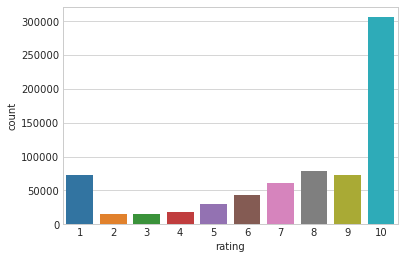

In [13]:
sns.countplot(x=review.rating)

### Length of reviews

In [8]:
review['length'] = review.review.apply(lambda x : len(x))

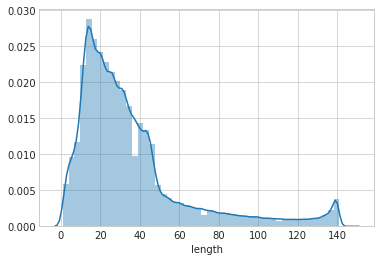

In [14]:
sns.distplot(review.length)

### Review Word distribution

In [4]:
count = Counter([split for split_list in review.review.apply(lambda text : text.split()) for split in split_list])

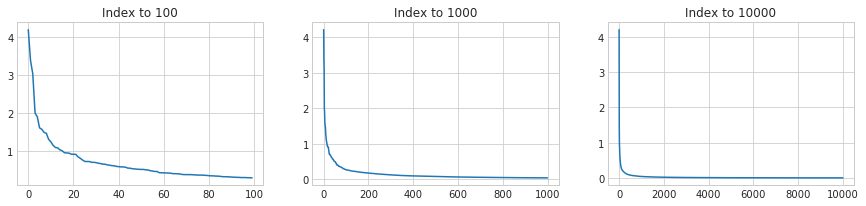

In [12]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize = (15,3))

num_words = [100, 1000, 10000]
for ax, num_word in zip(axes, num_words):
    ax.plot([i for i in range(num_word)], [right/len(count) * 100 for _, right in count.most_common(num_word)])
    ax.set_title('Index to {}'.format(num_word))

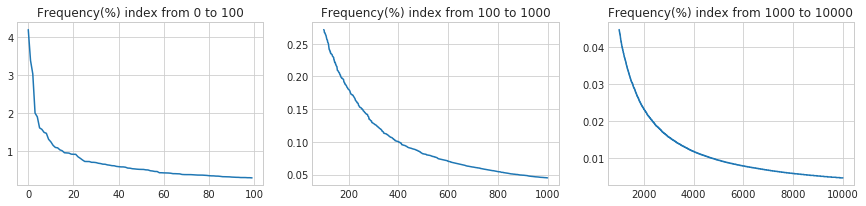

In [15]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize = (15,3))

num_words = [100, 1000, 10000]
before = 0 

for ax, num_word in zip(axes, num_words):
    ax.plot([i for i in range(before, num_word)], [right/len(count) * 100 for _, right in count.most_common(num_word)][before:num_word])
    ax.set_title('Frequency(%) index from {} to {}'.format(before, num_word))
    before = num_word

In [16]:
for i in range(0,500,100):
    print("-"*130)
    print("Most frequent words from {} to {}".format(i+1, i+100))
    print("-"*130)
    print(" ".join([word for word, _ in count.most_common(1000)[i:i+100]]))

----------------------------------------------------------------------------------------------------------------------------------
Most frequent words from 1 to 100
----------------------------------------------------------------------------------------------------------------------------------
영화 너무 정말 이 진짜 영화. 더 잘 수 좀 그냥 그 영화를 이런 보고 왜 영화는 최고의 있는 다 본 영화가 ㅋㅋ 좋은 다시 봤는데 많이 재밌게 역시 그리고 없는 내가 참 보는 것 한 난 하지만 이렇게 완전 하는 마지막 내 평점이 연기 이거 보면 평점 꼭 또 대한 그래도 가장 볼 이건 나름 드라마 이게 ㅋㅋㅋ ㅋ 같은 뭔가 재미있게 영화의 봐도 ㅠㅠ ㅎㅎ 연기가 스토리 넘 조금 많은 다른 아 아름다운 지금 근데 . 솔직히 아주 만든 없다. 끝까지 영화.. 최고 말이 할 내내 괜찮은 안 모두 10점 않은 .. 중 스토리가 연기도 배우들의 있다. 계속
----------------------------------------------------------------------------------------------------------------------------------
Most frequent words from 101 to 200
----------------------------------------------------------------------------------------------------------------------------------
때 여운이 어떻게 모든 영화! ^^ 같다. 뭐 꽤 나는 때문에 오랜만에 작품 특히 전혀 연기는 나오는 제일 마지막에 아닌 않고 아직도 내용이 한번 않는 무슨 하고 아니라 

### Good ( Rate 10 ) word distribution

In [17]:
good_count = Counter([split for split_list in review[review.rating==10].review.apply(lambda text : text.split()) for split in split_list])

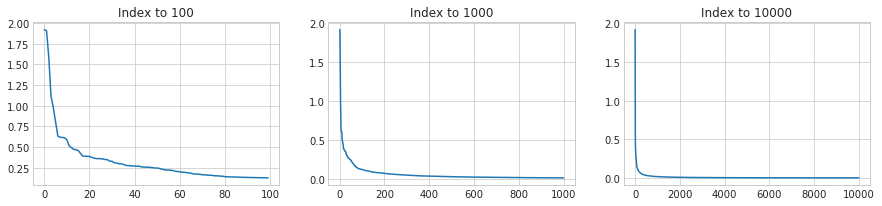

In [18]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize = (15,3))

num_words = [100, 1000, 10000]
for ax, num_word in zip(axes, num_words):
    ax.plot([i for i in range(num_word)], [right/len(count) * 100 for _, right in good_count.most_common(num_word)])
    ax.set_title('Index to {}'.format(num_word))

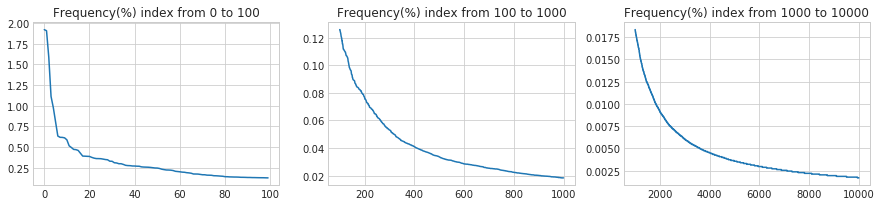

In [19]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize = (15,3))

num_words = [100, 1000, 10000]
before = 0 

for ax, num_word in zip(axes, num_words):
    ax.plot([i for i in range(before, num_word)], [right/len(count) * 100 for _, right in good_count.most_common(num_word)][before:num_word])
    ax.set_title('Frequency(%) index from {} to {}'.format(before, num_word))
    before = num_word

In [20]:
for i in range(0,300,100):
    print("-"*130)
    print("Most frequent words in GOOD from {} to {}".format(i+1, i+100))
    print("-"*130)
    print(" ".join([word for word, _ in good_count.most_common(1000)[i:i+100]]))

----------------------------------------------------------------------------------------------------------------------------------
Most frequent words in GOOD from 1 to 100
----------------------------------------------------------------------------------------------------------------------------------
정말 영화 너무 진짜 이 최고의 수 잘 영화. 더 보고 영화를 본 이런 다시 그 ㅋㅋ 재밌게 왜 있는 좋은 영화가 완전 꼭 봤는데 역시 다 영화는 내 내가 평점이 그냥 난 그리고 또 드라마 이거 많이 이렇게 연기 평점 참 최고 가장 ㅠㅠ 봐도 보는 좀 것 10점 한 마지막 ㅎㅎ 없는 넘 하는 말이 재미있게 ㅋㅋㅋ 아름다운 ㅋ 보면 볼 지금 많은 아 여운이 ^^ 대한 오랜만에 이게 영화! 아직도 중 아주 이건 모두 . 굿 연기가 같은 다른 연기도 영화의 때 내내 영화.. 모든 계속 특히 제일 명작 할 한번 멋진 감동 하지만 좋고 .. 가슴이
----------------------------------------------------------------------------------------------------------------------------------
Most frequent words in GOOD from 101 to 200
----------------------------------------------------------------------------------------------------------------------------------
그래도 재밌다 나는 눈물이 마음이 만든 봤던 좋아하는 재밌는 마지막에 남는 와 함께 보면서 재밌고 끝까지 주는 나도 감동적인 스토리 영화다. 근데 짱 영

### Bad ( Rate 1 ) word distribution

In [21]:
bad_count = Counter([split for split_list in review[review.rating==1].review.apply(lambda text : text.split()) for split in split_list])

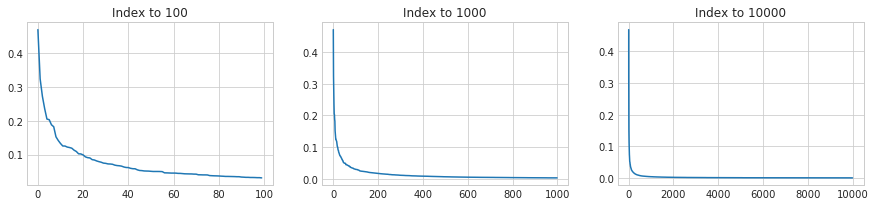

In [22]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize = (15,3))

num_words = [100, 1000, 10000]
for ax, num_word in zip(axes, num_words):
    ax.plot([i for i in range(num_word)], [right/len(count) * 100 for _, right in bad_count.most_common(num_word)])
    ax.set_title('Index to {}'.format(num_word))

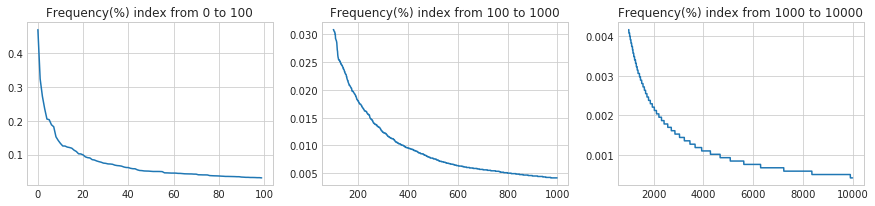

In [23]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize = (15,3))

num_words = [100, 1000, 10000]
before = 0 

for ax, num_word in zip(axes, num_words):
    ax.plot([i for i in range(before, num_word)], [right/len(count) * 100 for _, right in bad_count.most_common(num_word)][before:num_word])
    ax.set_title('Frequency(%) index from {} to {}'.format(before, num_word))
    before = num_word

In [24]:
for i in range(0,300,100):
    print("-"*130)
    print("Most frequent words in BAD from {} to {}".format(i+1, i+100))
    print("-"*130)
    print(" ".join([word for word, _ in bad_count.most_common(1000)[i:i+100]]))

----------------------------------------------------------------------------------------------------------------------------------
Most frequent words in BAD from 1 to 100
----------------------------------------------------------------------------------------------------------------------------------
영화 진짜 너무 정말 이 왜 그냥 이런 쓰레기 이건 다 영화. 평점 이게 영화는 영화를 더 내가 이거 영화가 좀 없는 최악의 이렇게 보고 ㅋㅋ 완전 무슨 그 본 내 아 평점이 없고 ㅡㅡ 1점도 봤는데 아깝다 보는 수 뭐 아까운 이걸 ㅋㅋㅋ 1점 보다가 안 차라리 참 만든 별 끝까지 . 솔직히 스토리 드라마 하는 그리고 연기 잘 도대체 보면 같은 한 시간 난 감독 시간이 어떻게 재미 없다. 감독이 ㅋ .. 영화라고 전혀 ... 진심 많이 없다 별로 또 재미도 걍 아깝다. 돈 개 있는 영화에 내내 하고 아니고 보다 절대 지루하고 것 내용도 내용이 아무리 나오는
----------------------------------------------------------------------------------------------------------------------------------
Most frequent words in BAD from 101 to 200
----------------------------------------------------------------------------------------------------------------------------------
할 하나도 좋은 재미없다 볼 역시 제대로 제발 이딴 최악 아니라 아주 때문에 ㅠㅠ 가장 스토리가 이제 안되는 말이 영화.. 이해가 스토리도

In [25]:
good_words = set([word for word, _ in good_count.most_common(500)])
bad_words = set([word for word, _ in bad_count.most_common(500)])

In [26]:
print("-"*130)
print("GOOD - BAD")
print("-"*130)
print(" ".join(good_words.difference(bad_words)))

----------------------------------------------------------------------------------------------------------------------------------
GOOD - BAD
----------------------------------------------------------------------------------------------------------------------------------
다시봐도 !! 보고싶은 좋고 아름다운 몇 좋다 따뜻해지는 슬픈 몇번을 최고!! 진정한 있게 않을 감동과 제 지금도 아름답고 재밌네요 사랑하는 여운이 봤습니다 언제나 앞으로 봐서 아깝지 약간 필요 우리가 몰입도 같아요 최고다 수작 우연히 good 가슴 모르고 마음이 반전 더욱 모습이 두 음악이 맘에 티비에서 해준 모습을 새로운 강추 영화였다. 가슴이 장면은 짱 연기에 대해 해주는 지금까지 드라마. 마음을 엄청난 알게 있다 그런지 마음 하게 봐야할 번 감동이 재밌는 좋네요 나의 재밌어요 남는 저는 사랑 눈물을 영화인데 유쾌한 날 ^^ 다시한번 통해 있었던 괜찮은 굉장히 그의 영화네요 느껴지는 나를 좋아요 영화입니다 봤어요 감동을 남을 이제야 항상 생각을 나에게 나왔으면 재미있어요 ~ 너무너무 있고 함께 슬프고 음악도 눈물 멋진 느끼게 이제서야 마음에 최고. 내인생 충분히 긴장감 어릴적 걸작 최고! 재밌다 추억의 생각보다 감동적이고 훌륭한 잊혀지지 최고다. 아직 감동적인 아이들이 대박 눈물이 영화입니다. 있어서 너무나 ㅎㅎㅎ 추천 시리즈 지루하지 생각하게 장면이 잔잔한 드라마를 예전에 이정도면 인생의 어렸을때 좋았고 지난 느낄 명작. 보세요 꿀잼 볼때마다 펑펑 이런게 사랑스러운 애니메이션 무엇보다 보게 생각 재밌음 재미있는 조금 눈을 좋다. 꽤 대단한 또한 매력적인 보여준 재미있다 필요없는 그들의 오랜만에 영화였습니다. 인생을 사랑이 것은 좋았다 재미있고 기대 간만에 너무나도 지금봐도 

In [27]:
print("-"*130)
print("BAD - GOOD")
print("-"*130)
print(" ".join(bad_words.difference(good_words)))

----------------------------------------------------------------------------------------------------------------------------------
BAD - GOOD
----------------------------------------------------------------------------------------------------------------------------------
아깝다!!! 지루하다 쓰레기. 지루하고 어디서 스토리에 아님 공포영화 작가가 억지 이런영화 뻔한 그만 나오고 tv 감독은 이해 이유가 못하는 돈이 못한 평점에 유치하고 재미없음 액션도 만들어 없고, 반개도 감동도 자꾸 억지로 주인공이 대체 아무리 막 참고 B급 최악 보지마세요 정도 했는데 못하고 것도 만들어도 갈수록 OO 전형적인 재미는 없어 -_- 최악의 막장 남자 전개 삼류 도저히 작가 영화보다 최악이다 중간에 하나도 이딴 하면 재미없어서 만들 졸라 재미없는 굳이 뭐야 질질 배우가 짜증나는 해도 평점보고 없음 평점은 어설픈 왠만하면 애들 이미 더빙 보는데 수준이 뭔 손발이 최악. 말도 시나리오 진부한 비해 쓰레기 지루해서 왜이렇게 ? 가지고 아무것도 0점은 존나 밑에 ;; 더럽게 이런거 점점 ㅅㅂ 갑자기 OOO기 믿고 ㅡ 혼자 쓰레기영화 알바 없네 재미없다 0점이 졸작 점수 안되는 여자가 영 발로 짜증 0점 돈주고 짜증나서 만들지 아깝다 지루한 기분 재미없고 내용은 전부 듯. 뭐냐 어색한 한국영화 아깝다. 없고 재미도 개연성 재미없네 아까운 이딴걸 발연기 느낌 1점 아까움 허접한 이상한 수준 알바들 1점도 아까워 하지 어느 여자 보는게 뭘 아놔 지루해 기대하고 별점 어이가 그게 영화중에 전개가 .... 말고 한국영화는 지루함 없음. 아니면 재미없다. 이젠 이런걸 ㅡㅡ 3류 더러운 주기도 왜이리 시간 모르겠다. 쓰레기같은 아오 그나마 개 이것도 이상 80년대 안되고 재미없어 하는

In [28]:
print("-"*130)
print("BAD AND GOOD")
print("-"*130)
print(" ".join(bad_words.intersection(good_words)))

----------------------------------------------------------------------------------------------------------------------------------
BAD AND GOOD
----------------------------------------------------------------------------------------------------------------------------------
저 것 영화관에서 전 아니 거의 아닌 나도 또 역시 스토리도 사람들이 그런 않은 된 보지 줄 싶은 중에 배우 수 알고 근데 제일 보는 , 너무 한 사람들은 아주 .. 대한 무슨 결말이 어떤 참 못 싶다. ... 영화도 이해가 감독의 할 같은 ㅜㅜ 내용 바로 연출 그래서 ㅋㅋㅋㅋ 주인공 이야기 드라마가 전혀 영화에 있다. 없다. 왜 이렇게 특히 연기도 감독이 영화는 듯 얼마나 큰 아니라 건 일단 걸 절대 한국 우리나라 같이 내 좀 보니 처음 배우들 요즘 봤다 게 중 하나 영화 빨리 그래도 와 나 많이 난 하는 보면 진심 코미디 없이 평점을 거 많은 꼭 다시 이런 딱 이영화를 제대로 좋아하는 인생 ㅋ 당시 드라마는 계속 말이 별 될 ㅋㅋㅋ 지금 보여주는 물론 있는 사람은 영화의 연기를 영화가 엄청 다 그대로 하고 재밌게 영화라고 사람이 생각이 극장에서 재미가 본 10점 결국 볼 뭔가 이영화 준 그렇게 다른 평점 누가 그냥 처음부터 별로 정도로 주고 넘 모든 . 마지막 만든 이걸 내용이 이건 나와서 이거 그리고 나온 없다 되는 봤던 연기는 매우 보다 솔직히 사람 보고 이제 오히려 없는 아 때문에 처음으로 안 제발 스토리 만드는 뭐 위한 ㅎㅎ 더 제가 이영화는 어떻게 나는 상당히 ㅠ 주는 영화다 ㅋㅋ 영화중 진짜 내가 드라마 해서 이 위해 기억에 원래 사람들 영화.. 싶다 평점이 연기력 최고의 하지만 ㅠㅠ 일본 것을 수가 아니다. 훨씬 마지막에 내용도 잘 봤는데 한번 같다. 좋은 영화

## Preparing data

In [3]:
data = load_original_data().xs(['review', 'rating'], axis = 1)
data.dropna(inplace =True)
data['length'] = data.review.apply(lambda text : len(text.split()))
data = data[['review', 'length', 'rating']]
data.head()

,review,length,rating
0,전체관람가는 아닌것 같아요,3,10
1,디렉터스컷으로봐서 거의 3시간짜리인데 참 흡인력있다,5,10
2,태어나 처음으로 가슴아리는 영화였다. 20년이상 지났지만.. 생각하면 또 가슴이...,17,10
3,어린시절 고딩때 봤던 때랑 또 결혼하고 나서 봤을때의 느낌은 확실히 다르네요. 뭔가...,29,10
4,토토에게 넓은 세상을 보여주고픈 알프레도.. 그가 토토를 위해 정을 떼려고 했던 장...,26,10


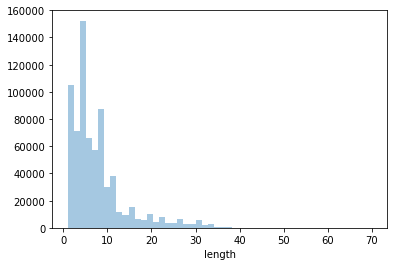

In [26]:
sns.distplot(data.length, kde=False)

In [23]:
count = Counter([split for split_list in data.review.apply(lambda text : text.split()) for split in split_list])
print("Vocab Size : {}".format(len(count)))

Vocab Size : 1177301


### Konlpy Phrases Parsing

<code> def parsing(text):
    Parser = Twitter()
    return Parser.morphs(text)

with codecs.open('filename', 'w', encoding='utf-8') as f:
    for line in tqdm.tqdm(data.review):
        f.write( " ".join(parsing(line)) + '\n') </code>

In [19]:
konlpy_data = load_konlpy_phrase_review_inner()
df = pd.DataFrame({'review': konlpy_data[:-1] , 'rating' : data.rating} )
df['length'] = df.review.apply(lambda text : len(text.split()))
df = df.xs(['review', 'len', 'rating'], axis = 1)
df.head()

,review,len,rating
0,전체관람가 는 아닌 것 같아 요,6,10
1,디렉터스컷 으로 봐 서 거의 3 시간 짜 리 인데 참 흡인 력 있다,14,10
2,태어나 처음 으로 가슴 아리 는 영화 였 다 . 20 년 이상 지났 지만 .. 생각...,34,10
3,어린시절 고딩 때 봤 던 때 랑 또 결혼 하고 나서 봤 을 때 의 느낌 은 확실히 ...,65,10
4,토토 에게 넓은 세상 을 보여 주 고픈 알 프레 도 .. 그 가 토토 를 위해 정 ...,53,10


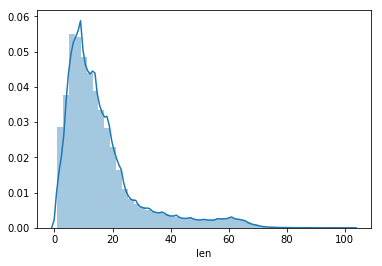

In [22]:
sns.distplot(df.length)

In [24]:
count = Counter([split for split_list in df.review.apply(lambda text : text.split()) for split in split_list])
print("Vocab Size : {}".format(len(count)))

Vocab Size : 120865


## Train_Test_Split and Save data

In [1]:
import numpy as np
import codecs 
import tqdm
import pickle
from collections import Counter
from load_data import load_konlpy_phrase_review
from sklearn.model_selection import train_test_split

preprocessing_vocab_size = 2**14 - 2 # for <UNK> & <PAD>

In [2]:
data = load_konlpy_phrase_review()
data.head()

,rating,review
0,10,전체관람가 는 아닌 것 같아 요
1,10,디렉터스컷 으로 봐 서 거의 3 시간 짜 리 인데 참 흡인 력 있다
2,10,태어나 처음 으로 가슴 아리 는 영화 였 다 . 20 년 이상 지났 지만 .. 생각...
3,10,어린시절 고딩 때 봤 던 때 랑 또 결혼 하고 나서 봤 을 때 의 느낌 은 확실히 ...
4,10,토토 에게 넓은 세상 을 보여 주 고픈 알 프레 도 .. 그 가 토토 를 위해 정 ...


In [3]:
count = Counter([split for split_list in data.review.apply(lambda text : text.split()) for split in split_list])
voca_list = [word for word, _ in count.most_common(preprocessing_vocab_size)]

word2int = { word : idx for idx, word in enumerate(voca_list, 2) }
word2int[u'<PAD>'] = 0 
word2int[u'<UKN>'] = 1

int2word = { idx : word for idx, word in enumerate(voca_list, 2) }
int2word[0] = u'<PAD>'
int2word[1] = u'<UKN>'

In [4]:
print("Vocab size (by Frequency): {}".format(len(word2int)))

Vocab size (by Frequency): 16384


In [5]:
train, test = train_test_split(data, test_size = .2)
train, validation = train_test_split ( train, test_size = .2)

### Write the training / validation / test data in disk

In [7]:
with codecs.open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/review_train', 'w', encoding='utf-8') as f:
    for line in tqdm.tqdm(train.review):
        f.write( " ".join([word.decode('utf-8') if word in voca_list else u'<UNK>' for word in line.split()]) + '\n' )

with codecs.open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/review_validation', 'w', encoding='utf-8') as f:
    for line in tqdm.tqdm(validation.review):
        f.write( " ".join([word.decode('utf-8') if word in voca_list else u'<UNK>' for word in line.split()]) + '\n' )
        
with codecs.open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/review_test', 'w', encoding='utf-8') as f:
    for line in tqdm.tqdm(test.review):
        f.write( " ".join([word.decode('utf-8') if word in voca_list else u'<UNK>' for word in line.split()]) + '\n' )


np.save('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/rating_train.npy' , train.rating)
np.save('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/rating_validation.npy' , validation.rating)
np.save('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/rating_test.npy' , test.rating)

100%|██████████| 142477/142477 [02:14<00:00, 1063.13it/s]


In [8]:
with open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/word2int.pkl', 'wb') as f:
    pickle.dump(word2int, f, pickle.HIGHEST_PROTOCOL)

with open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/int2word.pkl', 'wb') as f:
    pickle.dump(int2word, f, pickle.HIGHEST_PROTOCOL)    

# CHECK POINT 

In [1]:
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import pickle
import numpy as np
import pandas as pd
import tqdm
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
class Hparams():
    def __init__(self):
        self.embed_size = 2**9 # 512
        self.voca_size = 2**14 -2 # 16k
        self.layer_size = 2**9 # 512
        self.drop_rate = 0.8 
        
        self.batch_size = 2**8 # 256
        self.num_stack_cell = 2

class Config():
    def __init__(self):

        self.save_path = '/media/disk1/public_milab/Udacity/Naver_hackathon/rating/log/LSTM_Attention/'
        self.log_path = self.save_path
        self.summary_every_step = 100
        self.save_every_step = 2000        
        self.max_to_keep = 5
        self.epoch = 100                
        
hparams = Hparams()
config = Config()

### Make Dataset for Training

### TODO : Modularization

#### Load voca

In [3]:
with open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/word2int.pkl', 'rb') as f:
    word2int = pickle.load(f)
with open('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/int2word.pkl', 'rb') as f:
    int2word = pickle.load(f)

#### Load labels ( from 1 to 10 )

In [4]:
train_y =      np.load('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/rating_train.npy')
validation_y = np.load('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/rating_validation.npy')
test_y =       np.load('/media/disk1/public_milab/Udacity/Naver_hackathon/rating/rating_test.npy')

### Load reviews & Make dataset object for Feeding

#### Make hashTable

In [5]:
hash_key = tf.convert_to_tensor([key.decode('utf-8') for key in word2int.keys()], tf.string)
hash_value = tf.convert_to_tensor([word2int.get(key) for key in word2int.keys()], tf.int32)

table = tf.contrib.lookup.HashTable(tf.contrib.lookup.KeyValueTensorInitializer(hash_key, hash_value), 1) #defalut value 없으면? 

#### Training dataset

In [6]:
train_dataset = tf.data.TextLineDataset(['/media/disk1/public_milab/Udacity/Naver_hackathon/rating/review_train'])
train_dataset = train_dataset.map(lambda string: tf.string_split([string]).values) #Sparse tensor to Dense tensor
train_dataset = train_dataset.map(lambda words: (words, tf.size(words)))
train_dataset = train_dataset.map(lambda words, size: (table.lookup(words), size))
train_dataset = train_dataset.padded_batch(hparams.batch_size, (tf.TensorShape([None]),tf.TensorShape([])))

train_rating = tf.data.Dataset.from_tensor_slices(train_y)
train_rating = train_rating.batch(hparams.batch_size)

train_dataset = tf.data.Dataset.zip((train_dataset, train_rating))
train_dataset = train_dataset.map(lambda (inputs, size), labels : (inputs, labels, size) )
train_dataset = train_dataset.repeat(config.epoch)

train_data_iter  = train_dataset.make_initializable_iterator()
train_data_init = train_data_iter.initializer
train_inputs, train_labels, train_size = train_data_iter.get_next()

#### Validation dataset

In [7]:
val_dataset = tf.data.TextLineDataset(['/media/disk1/public_milab/Udacity/Naver_hackathon/rating/review_validation'])
val_dataset = val_dataset.map(lambda string: tf.string_split([string]).values) #Sparse tensor to Dense tensor
val_dataset = val_dataset.map(lambda words: (words, tf.size(words)))
val_dataset = val_dataset.map(lambda words, size: (table.lookup(words), size))
val_dataset = val_dataset.padded_batch(hparams.batch_size * 10, (tf.TensorShape([None]),tf.TensorShape([])))

val_rating = tf.data.Dataset.from_tensor_slices(validation_y)
val_rating = val_rating.batch(hparams.batch_size * 10)
val_dataset = tf.data.Dataset.zip((val_dataset, val_rating))
val_dataset = val_dataset.map(lambda (inputs, size), labels : (inputs, labels, size) )
val_dataset = val_dataset.repeat()

val_data_iter  = val_dataset.make_initializable_iterator()
val_data_init = val_data_iter.initializer
val_inputs, val_labels, val_size = val_data_iter.get_next()

### 반영할 것
    1. imbalnced data distribution -> 10점대가 다른 점수대에 비하여 많은 수를 차지하고 있다.
    2. Regression / Classification 어떤 방식으로 접근할 것인지
        2.1 Classification 한다면, Label smoothing 고려 해보기
    
    3. Decay Learning_rate 구현하기
    4. Session 을 이용해서 구현하기
        

## LSTM Encoding with Attention

#### layers

In [8]:
## Attention mechanism
def align(outputs, target, scope, reuse=False):
    with tf.variable_scope(scope, reuse=reuse):
        weight = tf.nn.softmax(tf.matmul(outputs, tf.expand_dims(target, -1)))
        weighted_sum = tf.matmul(tf.transpose(weight, perm=[0,2,1]), outputs)        
        align = tf.squeeze(weighted_sum, axis=1)
        
        return align

#### for label smoothing ( when the loss is classfication loss ( cross entropy ) )

In [9]:
def make_table(depth, smooth = 0.1):
    
    table = np.diag([smooth] * (depth-1), 1) + np.diag([smooth] * (depth-1), -1)  + np.eye(depth) * (1 - 2*smooth)
    table[0][2] = smooth
    table[-1][-3] = smooth    
    table = tf.convert_to_tensor(table)
    
    return table

def label_smoother(table, ids):    
    return tf.nn.embedding_lookup(table, ids)

### build model

In [10]:
class LSTM_Attention(object):
    """ Build LSTM_Attetion Model for Regression
    Args:
        inputs: Input tensors
        targets: Label tensor
        size: RNN batch length tensor for dynamic RNN  
        hparam: Hparameter
        config: Configuration
        is_train: True If this model is used for training else false
        """
                        
    @property
    def loss(self):
        return self._loss
    
    @property
    def train_op(self):
        return self._train_op
    
    @property
    def summary_op(self):
        return self._merge
    
    @property
    def epoch(self):
        return self._epoch
    
    @property
    def global_step(self):
        return self._global_step
    
    def __init__(self, inputs, targets, size, hparams, config, is_train):
        
        self._inputs = inputs
        self._size = size
        self._targets = targets
        self._hparams = hparams
        self._config  = config
        self._is_train = is_train
        self._build()
        
    def _build(self):
        
        self._enc = tf.contrib.layers.embed_sequence(ids=self._inputs, vocab_size=len(word2int), embed_dim=hparams.embed_size)
        
        _build_rnn = lambda i : tf.contrib.rnn.LSTMCell(int(hparams.layer_size / ( i + 1 )))
        self._cell = tf.contrib.rnn.MultiRNNCell([_build_rnn(i) for i in range(hparams.num_stack_cell)])
        
        outputs , state = tf.nn.dynamic_rnn(self._cell, self._enc, dtype=tf.float32, sequence_length=self._size)
        
        state = tf.concat([state[0][i] for i in range(len(state))], axis = -1)
        state = tf.layers.dense(inputs=state, units= outputs.shape.as_list()[-1], activation=tf.nn.sigmoid)
        
        print(outputs.shape)
        print(state.shape)
        ## attention
        align_ = align(outputs, state, 'align_layer')
        state = tf.concat([align_, state], axis = -1 )
        
        self._output = tf.layers.dense(state, int(hparams.layer_size / 2), activation=tf.nn.sigmoid)
        self._output = tf.layers.dropout(self._output, rate = hparams.drop_rate, training=self._is_train)
        self._output = tf.layers.dense(self._output, int(hparams.layer_size / 4), activation=tf.nn.sigmoid)
        self._output = tf.layers.dense(self._output, 1 , activation= None)
        self._output = tf.squeeze(self._output)
        
        self._acc = tf.reduce_mean(tf.cast(tf.equal(self._targets, tf.argmax(self._output, axis=-1)), tf.float32))
        self._loss = tf.losses.mean_squared_error(labels=self._targets, predictions= self._output)
        
        ## cross entropy loss ( classfication )
#         self._table = make_table(config.num_class, smooth = 0.00)
#         self._loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels=tf.one_hot(self._targets, depth=config.num_class) , 
#                                                                     logits = self._output))
        
        self._init_global_step_and_epoch()
        
        if self._is_train : 
            self._train_op = tf.train.AdamOptimizer().minimize(self._loss, global_step = self._global_step)
            
        loss_summary = tf.summary.scalar("train_loss" if self._is_train else "val_loss", self._loss)
        acc_summary = tf.summary.scalar("train_accuracy" if self._is_train else "val_accuracy", self._acc)
        self._merge = tf.summary.merge([loss_summary, acc_summary])

        self._init_saver()

        print("Model is built")
    
    
    def _init_saver(self):
        self._saver = tf.train.Saver()
        
    def _init_global_step_and_epoch(self):
        self._global_step = tf.Variable(0, trainable=False)
        self._epoch = tf.Variable(0, trainable=False)

    def evaluate(self, sess):
        pass

    def save(self, sess):
        self._saver.save(sess, config.save_path, global_step = self._global_step)
        
    def load(self, sess):
        self._saver.restore(sess, tf.train.latest_checkpoint(config.save_path))

### TODO : Modifiy Evaluation Loss 

**Gpu control**
<code>
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
</code>

In [11]:
Eval_Model = LSTM_Attention(inputs=val_inputs, 
                                    targets=val_labels, 
                                    size=val_size, 
                                    hparams=hparams, 
                                    config=config, 
                                    is_train= False)

(?, ?, 256)
(?, 256)
Model is built


In [12]:
with tf.Session() as sess:
    
    train_writer = tf.summary.FileWriter(config.log_path, sess.graph)
    val_writer = tf.summary.FileWriter(config.log_path + '/validation')

    with tf.variable_scope("root"):
        
        Train_Model = LSTM_Attention(train_inputs, train_labels, train_size, hparams, config, is_train = True)
    
    with tf.variable_scope("root", reuse=True):
        
        Eval_Model = LSTM_Attention(inputs=val_inputs, 
                                    targets=val_labels, 
                                    size=val_size, 
                                    hparams=hparams, 
                                    config=config, 
                                    is_train= False)
        
        sess.run([tf.global_variables_initializer(), tf.tables_initializer(), train_data_init, val_data_init])        
        step, epoch = sess.run([Train_Model.global_step, Train_Model.epoch])
        
    while True:
        try:
            if (step % config.summary_every_step == 0):                
                _, summary, step = sess.run([Train_Model.train_op, Train_Model.summary_op, Train_Model.global_step])
                train_writer.add_summary(summary, step)                                
                
                summary, accuracy, pred, label, loss = sess.run([Eval_Model.summary_op, 
                                                                 Eval_Model._acc, 
                                                                 Eval_Model._output, 
                                                                 Eval_Model._targets, 
                                                                 Eval_Model._loss])
                val_writer.add_summary(summary, step)             
                print("Step: {} / Loss : {} / Pred : {} / Label : {}".format(step, loss, map(lambda x : int(round(x)), pred[:5]), label[:5]))

            else :
                _, step = sess.run([Train_Model.train_op, Train_Model.global_step])
                
            if (step % config.save_every_step ==0):
                Train_Model.save(sess)
                print("Model is saved")
                
        except tf.errors.OutOfRangeError:
            print("Training is done")
            break 

Model is built
Model is built
Loss : 76.9767456055 / Pred : [-1, -1, -1, -1, 0] / Label : [10  9  1  9  1]
Loss : 8.88538169861 / Pred : [8, 8, 8, 8, 8] / Label : [ 2  7 10  8  1]
Loss : 9.18870544434 / Pred : [8, 8, 7, 8, 8] / Label : [10  8  3  6  9]
Loss : 9.05030918121 / Pred : [8, 8, 8, 8, 8] / Label : [ 1  1  8 10 10]
Loss : 9.51258182526 / Pred : [8, 8, 8, 8, 8] / Label : [10  8 10  3 10]
Loss : 9.00000476837 / Pred : [8, 8, 8, 8, 8] / Label : [10  1  8  5 10]
Loss : 8.78531932831 / Pred : [8, 8, 8, 8, 8] / Label : [ 1  9 10 10  9]
Loss : 8.70716762543 / Pred : [8, 8, 8, 8, 8] / Label : [10 10  1 10 10]
Loss : 7.54428577423 / Pred : [7, 8, 8, 8, 8] / Label : [10  7 10  8  8]
Loss : 6.40833902359 / Pred : [6, 9, 8, 8, 9] / Label : [ 8  8 10  3 10]
Loss : 6.18607616425 / Pred : [9, 8, 6, 6, 8] / Label : [10 10  5  5 10]
Loss : 5.74755001068 / Pred : [4, 9, 7, 8, 7] / Label : [ 1  8  6 10  7]
Loss : 5.95609855652 / Pred : [9, 8, 9, 3, 9] / Label : [10  8  8  5 10]
Loss : 5.28734111

KeyboardInterrupt: 

## Bidirectional Encoding with Attention

##  Convolution

## Attention

In [ ]:
def text_decoder(array):
    return " ".join([int2word.get(i).decode('utf-8') for i in array])

In [ ]:
with tf.Session() as sess:
    sess.run([tf.global_variables_initializer(),tf.tables_initializer(), data_iter.initializer])
    input_ , label_ = sess.run([inputs, labels])
    print(input_)
    print(label_)